# *Import Libraries:*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax, Nadam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.losses import CategoricalCrossentropy

In [26]:
t.__version__

NameError: name 'tf' is not defined

# *Preprocessing:*

In [3]:
df = pd.read_csv("Dataset\Dataset.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.shape

(480, 17)

In [5]:
df['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [6]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
categorical_attr = df.columns[df.dtypes == 'object']
categorical_attr

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [9]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

scale = StandardScaler()
X = scale.fit_transform(X)
y = to_categorical(y)

In [10]:
data = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [11]:
X_train, X_test, y_train, y_test = data
print("X_train: ",X_train.shape)
print("y_train: " ,y_train.shape)
print("X_val: " ,X_test.shape)
print("y_val:" ,y_test.shape)

X_train:  (384, 16)
y_train:  (384, 3)
X_val:  (96, 16)
y_val: (96, 3)


# *Implementing Model:*

In [12]:
def NN_model(data, layers, activation, optimizer, batch_norm=False, dropout=False):
    X_train, X_test, y_train, y_test = data
    
    # creat sequential model
    model = Sequential()

    # add input layer
    model.add(Input(layers[0]))

    # adding hidden layers
    for i in range(1, len(layers)-2):
        model.add(Dense(layers[i], activation=activation))
        if batch_norm: # add batchnorm layer
            model.add(BatchNormalization())
        if dropout: # add dropout layer
            model.add(Dropout(0.2)) 

    # output layer
    model.add(Dense(layers[-1], activation="softmax"))  

    
    model.compile(optimizer = optimizer, loss = CategoricalCrossentropy(), metrics = "accuracy")
    
    history = model.fit(X_train, y_train, batch_size=64, epochs=100, shuffle=True, verbose=2, validation_data=(X_test, y_test)).history

    return model, history

In [13]:
def report(model, history, data):
    X_train, X_test, y_train, y_test = data
    
    # training set
    print("\n********** Training set evaluation **********\n")
    y_pred_train = model.predict(X_train, verbose=0)
    
    # confusion matrix
    print("Training set confusion matrix:\n")
    print_confusion_matrix(y_train, y_pred_train)
    
    # classification report
    print("Training set metrics:\n")
    print_classification_report(y_train, y_pred_train)
   
    print()

    # test set
    print("********** Validation set evaluation **********\n")
    y_pred_test = model.predict(X_test, verbose=0)
    
    # confusion matrix
    print("Validation set confusion matrix:\n")
    print_confusion_matrix(y_test, y_pred_test)
    
    # classification report
    print("Validation set metrics:\n")
    print_classification_report(y_test, y_pred_test)
    
    # draw plots
    
    draw(history)

In [14]:
def print_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y.argmax(1), y_pred.argmax(1))
    cmd = ConfusionMatrixDisplay(cm, display_labels=["Low", "Medium", "High"])
    cmd.plot()
    plt.xlabel('Predicted Values', fontsize = 12)
    plt.ylabel('Actual Values', fontsize = 12)
    plt.show()
    print()

In [15]:
def print_classification_report(y, y_pred):
    report = classification_report(y.argmax(1), y_pred.argmax(1), target_names = ["Low", "Medium", "High"])
    print(report)
    print()

In [16]:
def draw(history):
    print("---------------------------------------------")
    fig, axis = plt.subplots(1, 2, figsize=(15,6))
    axis[0].set_title('Training & validation accuracy', fontsize = 15, fontweight = 'bold')
    axis[0].plot(history['accuracy'], label='training accuracy', color='darkblue')
    axis[0].plot(history['val_accuracy'], label='validation accuracy', color='deeppink')
    axis[0].legend()
    axis[1].set_title('Training & validation loss', fontsize = 15, fontweight = 'bold')
    axis[1].plot(history['loss'], label='training loss', color='darkblue')
    axis[1].plot(history['val_loss'], label='validation loss', color='deeppink')
    axis[1].legend()
    
    print("\n\nMaximum Accuracy of Training set: {:.8f}\nMinimum Loss of Trainig set: {:.8f}\n".format(np.max(history['accuracy']), np.min(history['loss'])))
    print("\n\nMaximum Accuracy of Training set: {:.8f}\nMinimum Loss of Trainig set: {:.8f}\n".format(np.max(history['val_accuracy']), np.min(history['val_loss'])))    

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 1s - loss: 1.0412 - accuracy: 0.4401 - val_loss: 0.9974 - val_accuracy: 0.4479 - 510ms/epoch - 85ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9145 - accuracy: 0.5755 - val_loss: 0.9169 - val_accuracy: 0.5521 - 26ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8386 - accuracy: 0.6302 - val_loss: 0.8648 - val_accuracy: 0.6146 - 32ms/epoch - 5ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7801 - accuracy: 0.6641 - val_loss: 0.8229 - val_accuracy: 0.6354 - 28ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7290 - accuracy: 0.6953 - val_loss: 0.7822 - val_accuracy: 0.6562 - 29ms/epoch - 5ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6847 - accuracy: 0.7188 - val_loss: 0.7473 - val_accuracy: 0.6458 - 23ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6476 - accuracy: 0.7292 - val_loss: 0.7206 - val_accuracy: 0.6562 - 24ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6158 - accuracy: 0.7578 - val_loss: 0.6981 - val_accuracy: 0.6458 - 42ms/epoch - 7ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2003 - accuracy: 0.9323 - val_loss: 0.7081 - val_accuracy: 0.7292 - 31ms/epoch - 5ms/step
Epoch 70/100
6/6 - 0s - loss: 0.1981 - accuracy: 0.9375 - val_loss: 0.6979 - val_accuracy: 0.7396 - 23ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.1960 - accuracy: 0.9427 - val_loss: 0.7064 - val_accuracy: 0.7292 - 31ms/epoch - 5ms/step
Epoch 72/100
6/6 - 0s - loss: 0.1919 - accuracy: 0.9401 - val_loss: 0.7225 - val_accuracy: 0.7396 - 17ms/epoch - 3ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1902 - accuracy: 0.9349 - val_loss: 0.6982 - val_accuracy: 0.7396 - 31ms/epoch - 5ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1846 - accuracy: 0.9427 - val_loss: 0.6970 - val_accuracy: 0.7292 - 29ms/epoch - 5ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1812 - accuracy: 0.9427 - val_loss: 0.7081 - val_accuracy: 0.7292 - 20ms/epoch - 3ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1818 - accuracy: 0.9427 - val_loss: 0.7010 - val_accuracy: 0.7292 - 43ms/epoch - 7ms/step
Epoch 77/100
6/6 - 0s - 

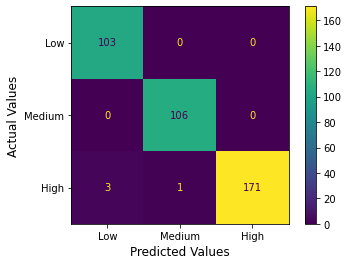


Training set metrics:

              precision    recall  f1-score   support

         Low       0.97      1.00      0.99       103
      Medium       0.99      1.00      1.00       106
        High       1.00      0.98      0.99       175

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



********** Validation set evaluation **********

Validation set confusion matrix:



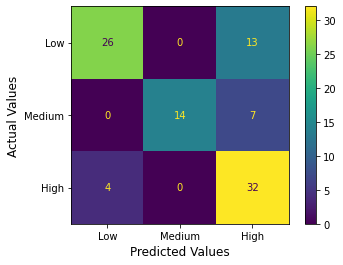


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.87      0.67      0.75        39
      Medium       1.00      0.67      0.80        21
        High       0.62      0.89      0.73        36

    accuracy                           0.75        96
   macro avg       0.83      0.74      0.76        96
weighted avg       0.80      0.75      0.75        96


---------------------------------------------


Maximum Accuracy of Training set: 0.97656250
Minimum Loss of Trainig set: 0.11849823



Maximum Accuracy of Training set: 0.76041669
Minimum Loss of Trainig set: 0.62553281



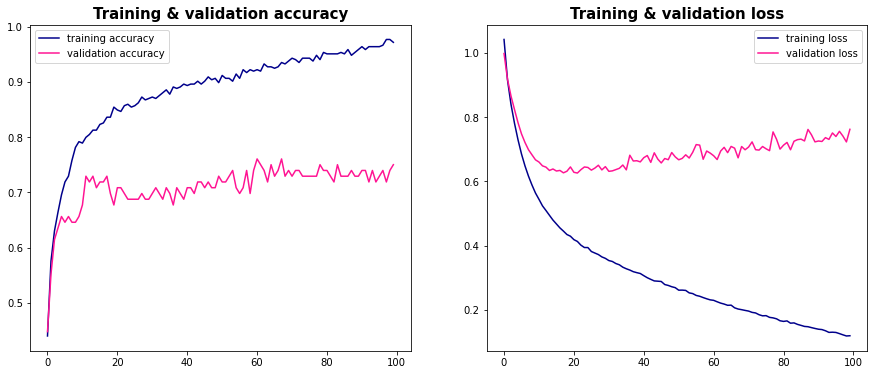

In [17]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Sigmoid
~ RMSprop

Epoch 1/100
6/6 - 1s - loss: 1.3180 - accuracy: 0.4557 - val_loss: 1.4461 - val_accuracy: 0.3750 - 539ms/epoch - 90ms/step
Epoch 2/100
6/6 - 0s - loss: 1.1700 - accuracy: 0.4557 - val_loss: 1.2894 - val_accuracy: 0.3750 - 30ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 1.1038 - accuracy: 0.4557 - val_loss: 1.2014 - val_accuracy: 0.3750 - 35ms/epoch - 6ms/step
Epoch 4/100
6/6 - 0s - loss: 1.0676 - accuracy: 0.4557 - val_loss: 1.1467 - val_accuracy: 0.3750 - 30ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 1.0485 - accuracy: 0.4557 - val_loss: 1.1123 - val_accuracy: 0.3750 - 36ms/epoch - 6ms/step
Epoch 6/100
6/6 - 0s - loss: 1.0320 - accuracy: 0.4557 - val_loss: 1.0860 - val_accuracy: 0.3750 - 37ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 1.0196 - accuracy: 0.4557 - val_loss: 1.0647 - val_accuracy: 0.3750 - 24ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 1.0069 - accuracy: 0.4557 - val_loss: 1.0520 - val_accuracy: 0.3750 - 24ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.5037 - accuracy: 0.7943 - val_loss: 0.6801 - val_accuracy: 0.6771 - 28ms/epoch - 5ms/step
Epoch 70/100
6/6 - 0s - loss: 0.5040 - accuracy: 0.7969 - val_loss: 0.6650 - val_accuracy: 0.6771 - 24ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.5017 - accuracy: 0.7995 - val_loss: 0.6737 - val_accuracy: 0.6771 - 24ms/epoch - 4ms/step
Epoch 72/100
6/6 - 0s - loss: 0.5001 - accuracy: 0.7891 - val_loss: 0.6770 - val_accuracy: 0.6771 - 32ms/epoch - 5ms/step
Epoch 73/100
6/6 - 0s - loss: 0.4988 - accuracy: 0.7891 - val_loss: 0.6665 - val_accuracy: 0.6875 - 30ms/epoch - 5ms/step
Epoch 74/100
6/6 - 0s - loss: 0.4954 - accuracy: 0.7969 - val_loss: 0.6646 - val_accuracy: 0.6875 - 25ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.4949 - accuracy: 0.7969 - val_loss: 0.6619 - val_accuracy: 0.6875 - 23ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.4940 - accuracy: 0.7969 - val_loss: 0.6666 - val_accuracy: 0.6875 - 22ms/epoch - 4ms/step
Epoch 77/100
6/6 - 0s - 

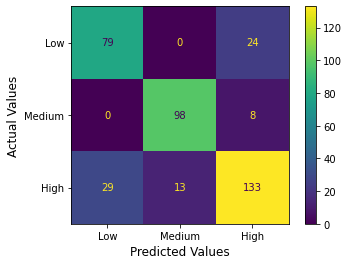


Training set metrics:

              precision    recall  f1-score   support

         Low       0.73      0.77      0.75       103
      Medium       0.88      0.92      0.90       106
        High       0.81      0.76      0.78       175

    accuracy                           0.81       384
   macro avg       0.81      0.82      0.81       384
weighted avg       0.81      0.81      0.81       384



********** Validation set evaluation **********

Validation set confusion matrix:



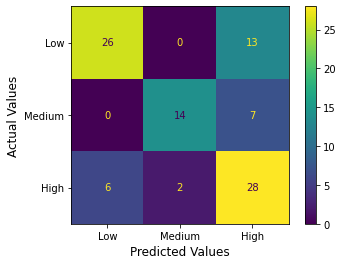


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.81      0.67      0.73        39
      Medium       0.88      0.67      0.76        21
        High       0.58      0.78      0.67        36

    accuracy                           0.71        96
   macro avg       0.76      0.70      0.72        96
weighted avg       0.74      0.71      0.71        96


---------------------------------------------


Maximum Accuracy of Training set: 0.80729169
Minimum Loss of Trainig set: 0.47357121



Maximum Accuracy of Training set: 0.70833331
Minimum Loss of Trainig set: 0.65864438



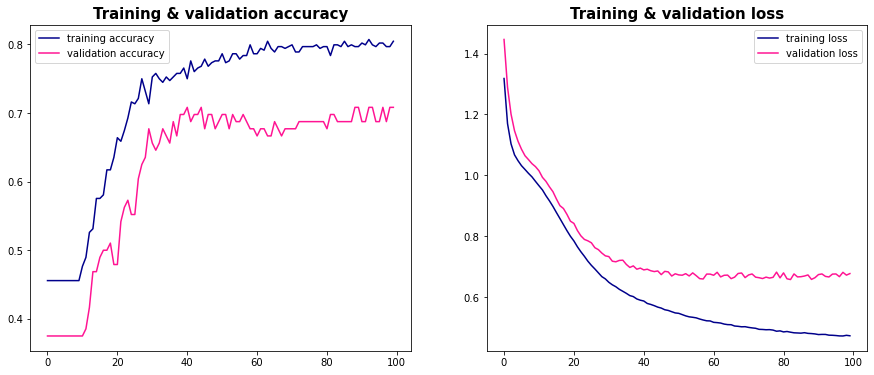

In [18]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "sigmoid", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 1s - loss: 1.0784 - accuracy: 0.3698 - val_loss: 1.0079 - val_accuracy: 0.4688 - 541ms/epoch - 90ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9209 - accuracy: 0.5573 - val_loss: 0.9356 - val_accuracy: 0.5104 - 28ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8387 - accuracy: 0.6536 - val_loss: 0.8849 - val_accuracy: 0.5104 - 36ms/epoch - 6ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7764 - accuracy: 0.6823 - val_loss: 0.8454 - val_accuracy: 0.5521 - 25ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7266 - accuracy: 0.7083 - val_loss: 0.8083 - val_accuracy: 0.5417 - 36ms/epoch - 6ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6826 - accuracy: 0.7396 - val_loss: 0.7756 - val_accuracy: 0.5938 - 36ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6445 - accuracy: 0.7604 - val_loss: 0.7485 - val_accuracy: 0.6250 - 30ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6123 - accuracy: 0.7656 - val_loss: 0.7278 - val_accuracy: 0.6458 - 30ms/epoch - 5ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2156 - accuracy: 0.9245 - val_loss: 0.6962 - val_accuracy: 0.7083 - 18ms/epoch - 3ms/step
Epoch 70/100
6/6 - 0s - loss: 0.2113 - accuracy: 0.9245 - val_loss: 0.7249 - val_accuracy: 0.7083 - 23ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.2076 - accuracy: 0.9271 - val_loss: 0.7198 - val_accuracy: 0.7188 - 18ms/epoch - 3ms/step
Epoch 72/100
6/6 - 0s - loss: 0.2033 - accuracy: 0.9297 - val_loss: 0.6923 - val_accuracy: 0.7188 - 23ms/epoch - 4ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1983 - accuracy: 0.9271 - val_loss: 0.7311 - val_accuracy: 0.6979 - 19ms/epoch - 3ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1977 - accuracy: 0.9297 - val_loss: 0.6964 - val_accuracy: 0.6875 - 24ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1960 - accuracy: 0.9219 - val_loss: 0.7217 - val_accuracy: 0.6979 - 24ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1909 - accuracy: 0.9427 - val_loss: 0.7333 - val_accuracy: 0.7083 - 27ms/epoch - 4ms/step
Epoch 77/100
6/6 - 0s - 

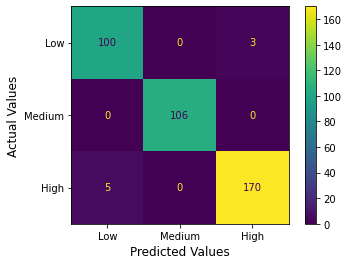


Training set metrics:

              precision    recall  f1-score   support

         Low       0.95      0.97      0.96       103
      Medium       1.00      1.00      1.00       106
        High       0.98      0.97      0.98       175

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



********** Validation set evaluation **********

Validation set confusion matrix:



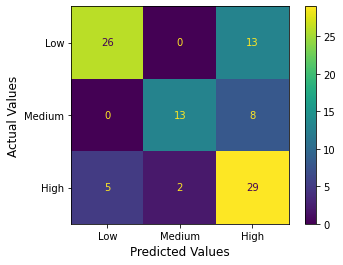


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.84      0.67      0.74        39
      Medium       0.87      0.62      0.72        21
        High       0.58      0.81      0.67        36

    accuracy                           0.71        96
   macro avg       0.76      0.70      0.71        96
weighted avg       0.75      0.71      0.71        96


---------------------------------------------


Maximum Accuracy of Training set: 0.96875000
Minimum Loss of Trainig set: 0.12590788



Maximum Accuracy of Training set: 0.71875000
Minimum Loss of Trainig set: 0.64265758



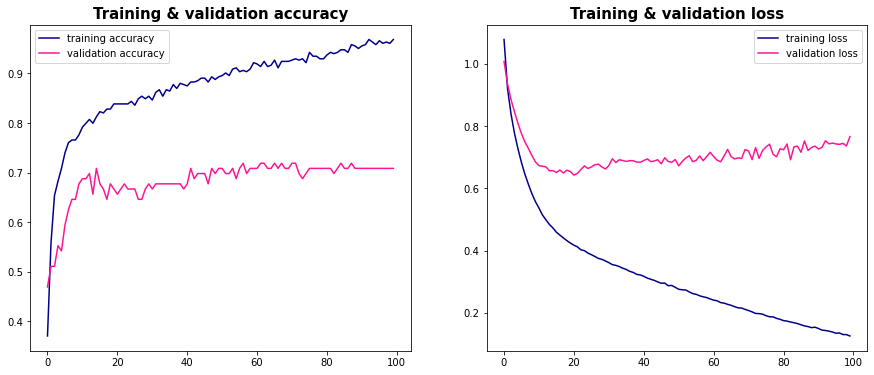

In [19]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 1s - loss: 1.0525 - accuracy: 0.4089 - val_loss: 0.9996 - val_accuracy: 0.4271 - 607ms/epoch - 101ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9189 - accuracy: 0.5885 - val_loss: 0.9213 - val_accuracy: 0.5208 - 26ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8375 - accuracy: 0.6589 - val_loss: 0.8687 - val_accuracy: 0.5417 - 25ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7696 - accuracy: 0.6979 - val_loss: 0.8186 - val_accuracy: 0.5938 - 27ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7131 - accuracy: 0.7318 - val_loss: 0.7796 - val_accuracy: 0.6250 - 27ms/epoch - 5ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6655 - accuracy: 0.7474 - val_loss: 0.7469 - val_accuracy: 0.6458 - 23ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6246 - accuracy: 0.7656 - val_loss: 0.7180 - val_accuracy: 0.6667 - 28ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5917 - accuracy: 0.7734 - val_loss: 0.6923 - val_accuracy: 0.6771 - 33ms/epoch - 6ms/step
Epoch 9/100
6/6 - 0s - loss: 

Epoch 69/100
6/6 - 0s - loss: 0.2107 - accuracy: 0.9323 - val_loss: 0.6762 - val_accuracy: 0.7500 - 27ms/epoch - 5ms/step
Epoch 70/100
6/6 - 0s - loss: 0.2090 - accuracy: 0.9245 - val_loss: 0.6683 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.2024 - accuracy: 0.9323 - val_loss: 0.6619 - val_accuracy: 0.7500 - 26ms/epoch - 4ms/step
Epoch 72/100
6/6 - 0s - loss: 0.2002 - accuracy: 0.9297 - val_loss: 0.6874 - val_accuracy: 0.7292 - 23ms/epoch - 4ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1962 - accuracy: 0.9349 - val_loss: 0.6761 - val_accuracy: 0.7500 - 26ms/epoch - 4ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1938 - accuracy: 0.9297 - val_loss: 0.6845 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1913 - accuracy: 0.9349 - val_loss: 0.7023 - val_accuracy: 0.7292 - 22ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1892 - accuracy: 0.9349 - val_loss: 0.7208 - val_accuracy: 0.7292 - 30ms/epoch - 5ms/step
Epoch 77/100
6/6 - 0s - 

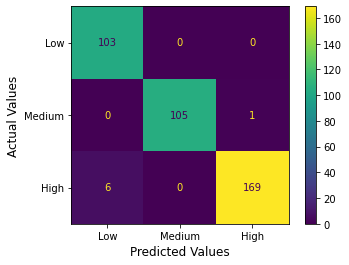


Training set metrics:

              precision    recall  f1-score   support

         Low       0.94      1.00      0.97       103
      Medium       1.00      0.99      1.00       106
        High       0.99      0.97      0.98       175

    accuracy                           0.98       384
   macro avg       0.98      0.99      0.98       384
weighted avg       0.98      0.98      0.98       384



********** Validation set evaluation **********

Validation set confusion matrix:



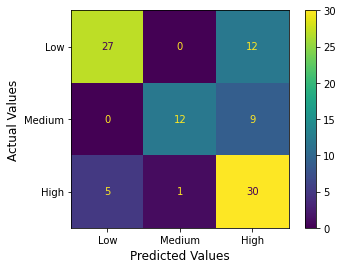


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.84      0.69      0.76        39
      Medium       0.92      0.57      0.71        21
        High       0.59      0.83      0.69        36

    accuracy                           0.72        96
   macro avg       0.79      0.70      0.72        96
weighted avg       0.77      0.72      0.72        96


---------------------------------------------


Maximum Accuracy of Training set: 0.97395831
Minimum Loss of Trainig set: 0.12068430



Maximum Accuracy of Training set: 0.75000000
Minimum Loss of Trainig set: 0.62917715



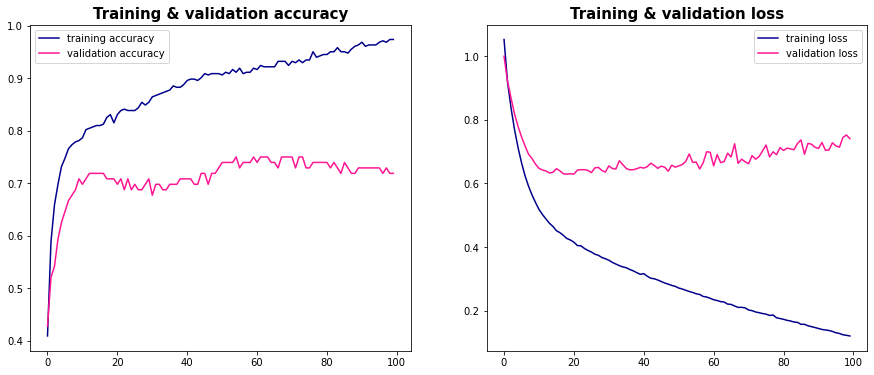

In [20]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 1s - loss: 1.0535 - accuracy: 0.4141 - val_loss: 0.9611 - val_accuracy: 0.4583 - 592ms/epoch - 99ms/step
Epoch 2/100
6/6 - 0s - loss: 0.8815 - accuracy: 0.5781 - val_loss: 0.8694 - val_accuracy: 0.5312 - 32ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 0.7917 - accuracy: 0.6641 - val_loss: 0.8096 - val_accuracy: 0.6146 - 29ms/epoch - 5ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7253 - accuracy: 0.7109 - val_loss: 0.7549 - val_accuracy: 0.6562 - 20ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6731 - accuracy: 0.7448 - val_loss: 0.7196 - val_accuracy: 0.6667 - 32ms/epoch - 5ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6320 - accuracy: 0.7682 - val_loss: 0.6969 - val_accuracy: 0.6979 - 22ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.5974 - accuracy: 0.7943 - val_loss: 0.6731 - val_accuracy: 0.7083 - 28ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5676 - accuracy: 0.8073 - val_loss: 0.6613 - val_accuracy: 0.7188 - 25ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.1892 - accuracy: 0.9375 - val_loss: 0.7137 - val_accuracy: 0.7396 - 27ms/epoch - 5ms/step
Epoch 70/100
6/6 - 0s - loss: 0.1840 - accuracy: 0.9453 - val_loss: 0.7056 - val_accuracy: 0.7500 - 23ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.1805 - accuracy: 0.9453 - val_loss: 0.7220 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 72/100
6/6 - 0s - loss: 0.1771 - accuracy: 0.9505 - val_loss: 0.7018 - val_accuracy: 0.7500 - 20ms/epoch - 3ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1756 - accuracy: 0.9479 - val_loss: 0.7124 - val_accuracy: 0.7500 - 24ms/epoch - 4ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1725 - accuracy: 0.9505 - val_loss: 0.7235 - val_accuracy: 0.7500 - 22ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1687 - accuracy: 0.9531 - val_loss: 0.7025 - val_accuracy: 0.7500 - 21ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1636 - accuracy: 0.9453 - val_loss: 0.7033 - val_accuracy: 0.7604 - 20ms/epoch - 3ms/step
Epoch 77/100
6/6 - 0s - 

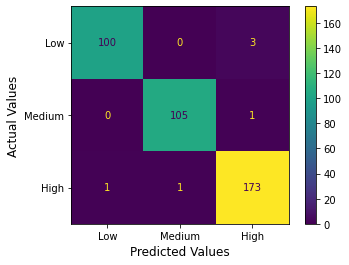


Training set metrics:

              precision    recall  f1-score   support

         Low       0.99      0.97      0.98       103
      Medium       0.99      0.99      0.99       106
        High       0.98      0.99      0.98       175

    accuracy                           0.98       384
   macro avg       0.99      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



********** Validation set evaluation **********

Validation set confusion matrix:



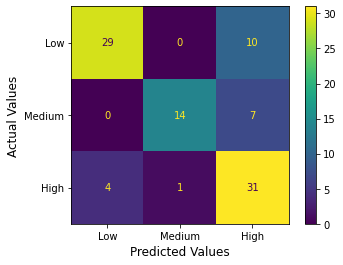


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.88      0.74      0.81        39
      Medium       0.93      0.67      0.78        21
        High       0.65      0.86      0.74        36

    accuracy                           0.77        96
   macro avg       0.82      0.76      0.77        96
weighted avg       0.80      0.77      0.77        96


---------------------------------------------


Maximum Accuracy of Training set: 0.98177081
Minimum Loss of Trainig set: 0.10097445



Maximum Accuracy of Training set: 0.78125000
Minimum Loss of Trainig set: 0.60096234



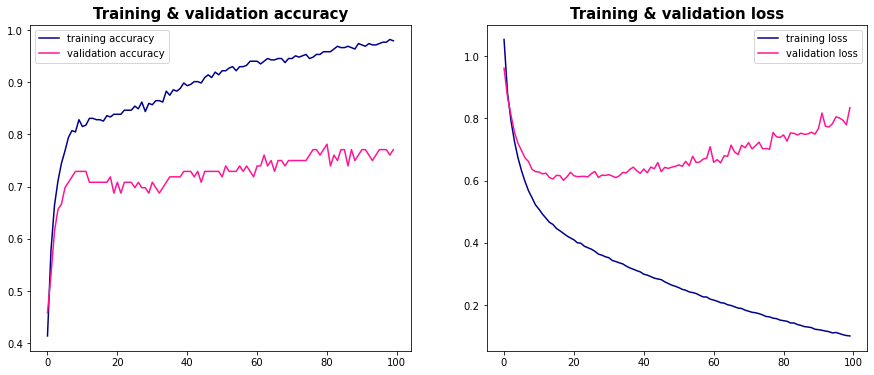

In [21]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 0s - loss: 1.1310 - accuracy: 0.3438 - val_loss: 0.9985 - val_accuracy: 0.4896 - 480ms/epoch - 80ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9541 - accuracy: 0.5156 - val_loss: 0.9068 - val_accuracy: 0.6042 - 31ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8609 - accuracy: 0.5938 - val_loss: 0.8435 - val_accuracy: 0.6354 - 29ms/epoch - 5ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7923 - accuracy: 0.6562 - val_loss: 0.7933 - val_accuracy: 0.6354 - 31ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7381 - accuracy: 0.7083 - val_loss: 0.7549 - val_accuracy: 0.6667 - 29ms/epoch - 5ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6925 - accuracy: 0.7292 - val_loss: 0.7217 - val_accuracy: 0.6875 - 23ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6548 - accuracy: 0.7448 - val_loss: 0.6933 - val_accuracy: 0.7188 - 27ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6232 - accuracy: 0.7604 - val_loss: 0.6770 - val_accuracy: 0.7188 - 36ms/epoch - 6ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2203 - accuracy: 0.9349 - val_loss: 0.6811 - val_accuracy: 0.7188 - 22ms/epoch - 4ms/step
Epoch 70/100
6/6 - 0s - loss: 0.2178 - accuracy: 0.9375 - val_loss: 0.7015 - val_accuracy: 0.7083 - 20ms/epoch - 3ms/step
Epoch 71/100
6/6 - 0s - loss: 0.2147 - accuracy: 0.9375 - val_loss: 0.7022 - val_accuracy: 0.7188 - 30ms/epoch - 5ms/step
Epoch 72/100
6/6 - 0s - loss: 0.2093 - accuracy: 0.9505 - val_loss: 0.6680 - val_accuracy: 0.7188 - 27ms/epoch - 5ms/step
Epoch 73/100
6/6 - 0s - loss: 0.2066 - accuracy: 0.9401 - val_loss: 0.6653 - val_accuracy: 0.7188 - 22ms/epoch - 4ms/step
Epoch 74/100
6/6 - 0s - loss: 0.2023 - accuracy: 0.9479 - val_loss: 0.7056 - val_accuracy: 0.7083 - 20ms/epoch - 3ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1996 - accuracy: 0.9427 - val_loss: 0.6933 - val_accuracy: 0.7292 - 22ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1965 - accuracy: 0.9427 - val_loss: 0.6805 - val_accuracy: 0.7188 - 20ms/epoch - 3ms/step
Epoch 77/100
6/6 - 0s - 

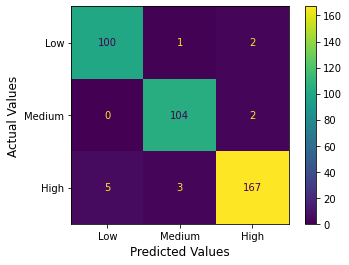


Training set metrics:

              precision    recall  f1-score   support

         Low       0.95      0.97      0.96       103
      Medium       0.96      0.98      0.97       106
        High       0.98      0.95      0.97       175

    accuracy                           0.97       384
   macro avg       0.96      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



********** Validation set evaluation **********

Validation set confusion matrix:



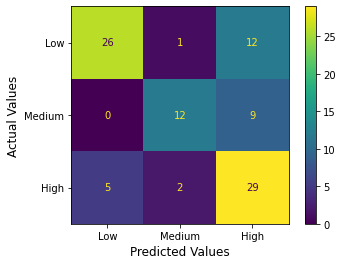


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.84      0.67      0.74        39
      Medium       0.80      0.57      0.67        21
        High       0.58      0.81      0.67        36

    accuracy                           0.70        96
   macro avg       0.74      0.68      0.69        96
weighted avg       0.73      0.70      0.70        96


---------------------------------------------


Maximum Accuracy of Training set: 0.97135419
Minimum Loss of Trainig set: 0.12982939



Maximum Accuracy of Training set: 0.72916669
Minimum Loss of Trainig set: 0.59878004



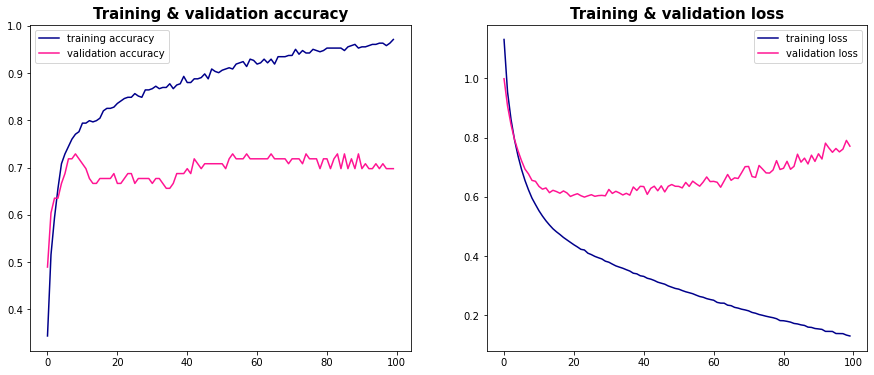

In [22]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 0s - loss: 1.0083 - accuracy: 0.4375 - val_loss: 0.9479 - val_accuracy: 0.5104 - 396ms/epoch - 66ms/step
Epoch 2/100
6/6 - 0s - loss: 0.8538 - accuracy: 0.5964 - val_loss: 0.8609 - val_accuracy: 0.5625 - 29ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 0.7790 - accuracy: 0.6719 - val_loss: 0.8027 - val_accuracy: 0.6250 - 28ms/epoch - 5ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7207 - accuracy: 0.7109 - val_loss: 0.7618 - val_accuracy: 0.6354 - 28ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6776 - accuracy: 0.7370 - val_loss: 0.7299 - val_accuracy: 0.6250 - 26ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6396 - accuracy: 0.7474 - val_loss: 0.7103 - val_accuracy: 0.6562 - 36ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6108 - accuracy: 0.7578 - val_loss: 0.6909 - val_accuracy: 0.6562 - 37ms/epoch - 6ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5848 - accuracy: 0.7682 - val_loss: 0.6826 - val_accuracy: 0.6458 - 28ms/epoch - 5ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2016 - accuracy: 0.9401 - val_loss: 0.7461 - val_accuracy: 0.7396 - 21ms/epoch - 4ms/step
Epoch 70/100
6/6 - 0s - loss: 0.1974 - accuracy: 0.9427 - val_loss: 0.7729 - val_accuracy: 0.7188 - 18ms/epoch - 3ms/step
Epoch 71/100
6/6 - 0s - loss: 0.1941 - accuracy: 0.9479 - val_loss: 0.7575 - val_accuracy: 0.7292 - 32ms/epoch - 5ms/step
Epoch 72/100
6/6 - 0s - loss: 0.1918 - accuracy: 0.9479 - val_loss: 0.7523 - val_accuracy: 0.7292 - 21ms/epoch - 3ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1870 - accuracy: 0.9453 - val_loss: 0.7904 - val_accuracy: 0.7083 - 19ms/epoch - 3ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1867 - accuracy: 0.9375 - val_loss: 0.7725 - val_accuracy: 0.7292 - 24ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1793 - accuracy: 0.9557 - val_loss: 0.7750 - val_accuracy: 0.7292 - 22ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1797 - accuracy: 0.9557 - val_loss: 0.7708 - val_accuracy: 0.7292 - 19ms/epoch - 3ms/step
Epoch 77/100
6/6 - 0s - 

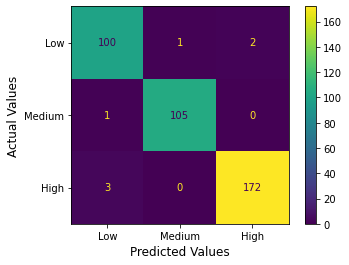


Training set metrics:

              precision    recall  f1-score   support

         Low       0.96      0.97      0.97       103
      Medium       0.99      0.99      0.99       106
        High       0.99      0.98      0.99       175

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



********** Validation set evaluation **********

Validation set confusion matrix:



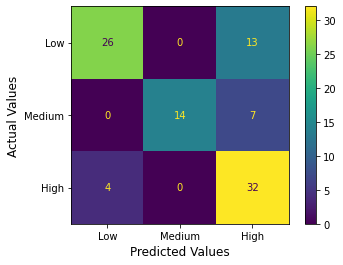


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.87      0.67      0.75        39
      Medium       1.00      0.67      0.80        21
        High       0.62      0.89      0.73        36

    accuracy                           0.75        96
   macro avg       0.83      0.74      0.76        96
weighted avg       0.80      0.75      0.75        96


---------------------------------------------


Maximum Accuracy of Training set: 0.97135419
Minimum Loss of Trainig set: 0.11630530



Maximum Accuracy of Training set: 0.77083331
Minimum Loss of Trainig set: 0.65553981



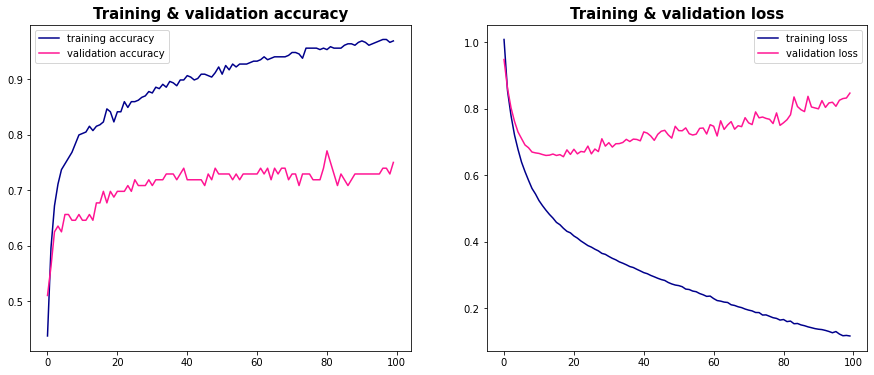

In [23]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 0s - loss: 1.0915 - accuracy: 0.4219 - val_loss: 0.9831 - val_accuracy: 0.5625 - 423ms/epoch - 70ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9374 - accuracy: 0.5885 - val_loss: 0.9095 - val_accuracy: 0.6354 - 24ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8502 - accuracy: 0.6589 - val_loss: 0.8542 - val_accuracy: 0.6667 - 23ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7848 - accuracy: 0.7292 - val_loss: 0.8128 - val_accuracy: 0.6667 - 27ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7287 - accuracy: 0.7500 - val_loss: 0.7704 - val_accuracy: 0.6562 - 23ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6827 - accuracy: 0.7552 - val_loss: 0.7393 - val_accuracy: 0.6667 - 27ms/epoch - 5ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6423 - accuracy: 0.7448 - val_loss: 0.7153 - val_accuracy: 0.6667 - 25ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6101 - accuracy: 0.7422 - val_loss: 0.6967 - val_accuracy: 0.6667 - 23ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2090 - accuracy: 0.9375 - val_loss: 0.6820 - val_accuracy: 0.7292 - 23ms/epoch - 4ms/step
Epoch 70/100
6/6 - 0s - loss: 0.2062 - accuracy: 0.9349 - val_loss: 0.6996 - val_accuracy: 0.7292 - 27ms/epoch - 5ms/step
Epoch 71/100
6/6 - 0s - loss: 0.2040 - accuracy: 0.9349 - val_loss: 0.6996 - val_accuracy: 0.7292 - 23ms/epoch - 4ms/step
Epoch 72/100
6/6 - 0s - loss: 0.1984 - accuracy: 0.9375 - val_loss: 0.6913 - val_accuracy: 0.7292 - 28ms/epoch - 5ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1954 - accuracy: 0.9427 - val_loss: 0.6914 - val_accuracy: 0.7396 - 29ms/epoch - 5ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1925 - accuracy: 0.9401 - val_loss: 0.7063 - val_accuracy: 0.7292 - 24ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1890 - accuracy: 0.9505 - val_loss: 0.6949 - val_accuracy: 0.7292 - 26ms/epoch - 4ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1882 - accuracy: 0.9453 - val_loss: 0.7209 - val_accuracy: 0.7292 - 23ms/epoch - 4ms/step
Epoch 77/100
6/6 - 0s - 

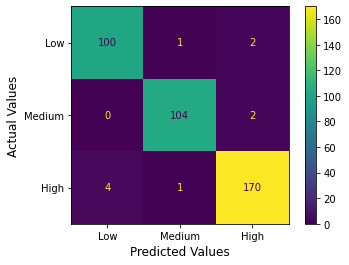


Training set metrics:

              precision    recall  f1-score   support

         Low       0.96      0.97      0.97       103
      Medium       0.98      0.98      0.98       106
        High       0.98      0.97      0.97       175

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



********** Validation set evaluation **********

Validation set confusion matrix:



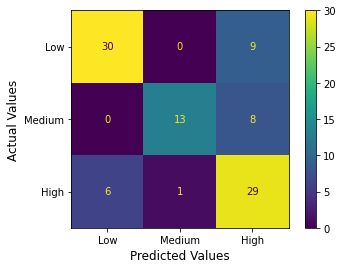


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.83      0.77      0.80        39
      Medium       0.93      0.62      0.74        21
        High       0.63      0.81      0.71        36

    accuracy                           0.75        96
   macro avg       0.80      0.73      0.75        96
weighted avg       0.78      0.75      0.75        96


---------------------------------------------


Maximum Accuracy of Training set: 0.96875000
Minimum Loss of Trainig set: 0.12092129



Maximum Accuracy of Training set: 0.76041669
Minimum Loss of Trainig set: 0.63294035



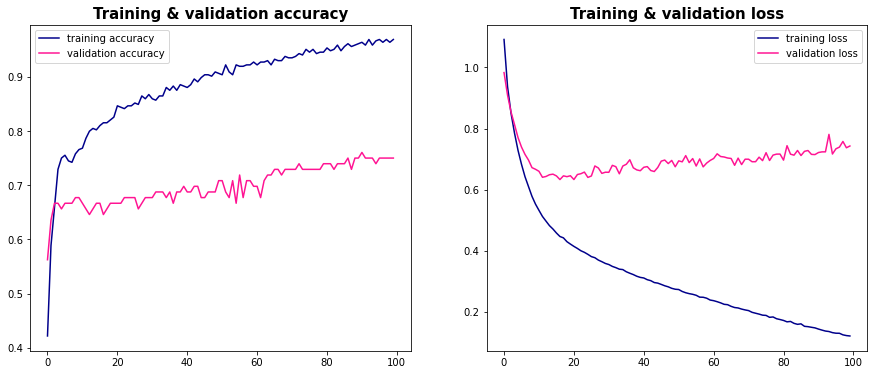

In [24]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)

## *4 Layer Model (Simple model)*
~ Relu
~ RMSprop

Epoch 1/100
6/6 - 0s - loss: 1.0533 - accuracy: 0.4818 - val_loss: 0.9400 - val_accuracy: 0.5625 - 478ms/epoch - 80ms/step
Epoch 2/100
6/6 - 0s - loss: 0.8920 - accuracy: 0.6068 - val_loss: 0.8741 - val_accuracy: 0.5833 - 30ms/epoch - 5ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8089 - accuracy: 0.6771 - val_loss: 0.8257 - val_accuracy: 0.6146 - 35ms/epoch - 6ms/step
Epoch 4/100
6/6 - 0s - loss: 0.7492 - accuracy: 0.6875 - val_loss: 0.7863 - val_accuracy: 0.6250 - 24ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6986 - accuracy: 0.7318 - val_loss: 0.7577 - val_accuracy: 0.6146 - 25ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6572 - accuracy: 0.7448 - val_loss: 0.7317 - val_accuracy: 0.6146 - 36ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6218 - accuracy: 0.7656 - val_loss: 0.7129 - val_accuracy: 0.6250 - 36ms/epoch - 6ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5937 - accuracy: 0.7682 - val_loss: 0.7022 - val_accuracy: 0.6250 - 36ms/epoch - 6ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.2082 - accuracy: 0.9375 - val_loss: 0.7111 - val_accuracy: 0.7188 - 23ms/epoch - 4ms/step
Epoch 70/100
6/6 - 0s - loss: 0.2056 - accuracy: 0.9323 - val_loss: 0.7045 - val_accuracy: 0.7188 - 22ms/epoch - 4ms/step
Epoch 71/100
6/6 - 0s - loss: 0.2017 - accuracy: 0.9401 - val_loss: 0.7423 - val_accuracy: 0.7396 - 23ms/epoch - 4ms/step
Epoch 72/100
6/6 - 0s - loss: 0.1994 - accuracy: 0.9401 - val_loss: 0.7386 - val_accuracy: 0.7396 - 23ms/epoch - 4ms/step
Epoch 73/100
6/6 - 0s - loss: 0.1955 - accuracy: 0.9427 - val_loss: 0.7017 - val_accuracy: 0.7292 - 22ms/epoch - 4ms/step
Epoch 74/100
6/6 - 0s - loss: 0.1936 - accuracy: 0.9349 - val_loss: 0.7409 - val_accuracy: 0.7292 - 22ms/epoch - 4ms/step
Epoch 75/100
6/6 - 0s - loss: 0.1877 - accuracy: 0.9453 - val_loss: 0.7118 - val_accuracy: 0.7188 - 18ms/epoch - 3ms/step
Epoch 76/100
6/6 - 0s - loss: 0.1862 - accuracy: 0.9401 - val_loss: 0.7487 - val_accuracy: 0.7188 - 24ms/epoch - 4ms/step
Epoch 77/100
6/6 - 0s - 

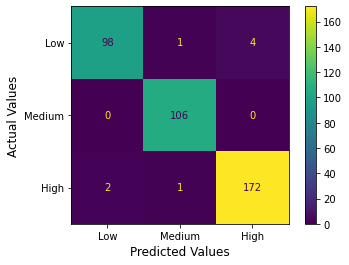


Training set metrics:

              precision    recall  f1-score   support

         Low       0.98      0.95      0.97       103
      Medium       0.98      1.00      0.99       106
        High       0.98      0.98      0.98       175

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



********** Validation set evaluation **********

Validation set confusion matrix:



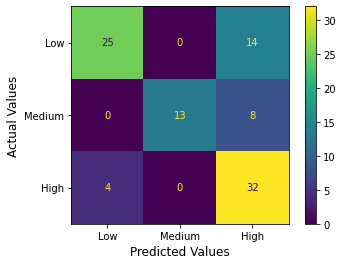


Validation set metrics:

              precision    recall  f1-score   support

         Low       0.86      0.64      0.74        39
      Medium       1.00      0.62      0.76        21
        High       0.59      0.89      0.71        36

    accuracy                           0.73        96
   macro avg       0.82      0.72      0.74        96
weighted avg       0.79      0.73      0.73        96


---------------------------------------------


Maximum Accuracy of Training set: 0.97916669
Minimum Loss of Trainig set: 0.11670890



Maximum Accuracy of Training set: 0.75000000
Minimum Loss of Trainig set: 0.66797495



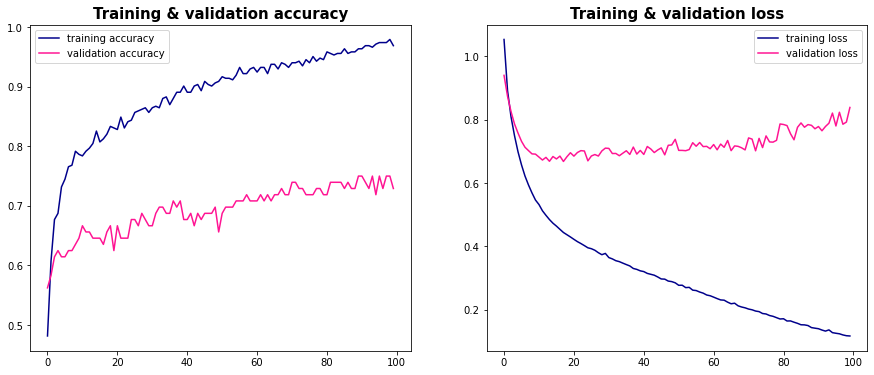

In [25]:
layers = [X_train.shape[1], 64, 32, 16, 3]
model, history = NN_model(data, layers, "relu", RMSprop(0.001))
report(model, history, data)